# Dimensionality reduction

Dimensionality reduction is a crucial step in machine learning model development since it helps to reduce overfitting and improving model overall performance. There are some dimensionality reduction techniques; in this case, a method based on feature importance will be used. This method uses an ensemble model since it generates a feature importance rank. XGBoost is a powerful ensemble model that allow to work with categorical features, null values and outliers, ideal for our dataset.

# Preparing the environment

In [7]:
import pandas as pd
from xgboost import XGBClassifier
import sys
sys.path.append('../ecommerce_customer_churn_prevention')
from data import make_dataset
from utils import paths

# Importing the data

In [8]:
df = pd.read_csv(paths.data_processed_dir('df_processed.csv'))
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,WarehouseToHome_Tenure_Ratio,HourSpendOnApp_Tenure_Ratio,SatisfactionScore_Tenure_Ratio,HourSpendOnApp_NumberOfDeviceRegistered,SatisfactionScore_NumberOfDeviceRegistered,SatisfactionScore_OrderCount,SatisfactionScore_CouponUsed,SatisfactionScore_CashbackAmount,CashbackAmount_Tenure_Ratio,CashbackAmount_CouponUsed_Ratio
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,1.2,0.6,0.4,9.0,6,2.0,2.0,319.86,31.986,79.965
1,50002,1,NaN,Mobile Phone,1,8.0,UPI,Male,3.0,4,...,NaN,NaN,NaN,12.0,12,3.0,0.0,362.70,NaN,120.900
2,50003,1,NaN,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,...,NaN,NaN,NaN,8.0,12,3.0,0.0,360.84,NaN,120.280
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,...,15.0,2.0,5.0,8.0,20,5.0,0.0,670.35,134.070,134.070
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,NaN,3,...,12.0,NaN,5.0,NaN,15,5.0,5.0,648.00,129.600,64.800


In [9]:
# Converting the features to categorical like the data dictionary

cat_features = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

df[cat_features] = df[cat_features].astype('category')

# Converting the new features to categorical
new_feat_cat = [col for col in df.select_dtypes('object').columns]
df[new_feat_cat] = df[new_feat_cat].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   CustomerID                                  5630 non-null   int64   
 1   Churn                                       5630 non-null   int64   
 2   Tenure                                      5366 non-null   float64 
 3   PreferredLoginDevice                        5630 non-null   category
 4   CityTier                                    5630 non-null   category
 5   WarehouseToHome                             5379 non-null   float64 
 6   PreferredPaymentMode                        5630 non-null   category
 7   Gender                                      5630 non-null   category
 8   HourSpendOnApp                              5375 non-null   float64 
 9   NumberOfDeviceRegistered                    5630 non-null   int64   
 10  

In [10]:
# Generating X and y

X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']

In [11]:
# Instantiating the model

estimator = XGBClassifier(
    random_state=42,
    objective='binary:logistic',
    eval_metric='logloss', 
    enable_categorical=True,
    booster='dart',
    tree_method='hist',
    max_depth=6,
    n_estimators=1000,
    learning_rate=0.01,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0, 
    early_stopping_rounds=50
)

[0]	validation_0-logloss:0.44943
[1]	validation_0-logloss:0.44552
[2]	validation_0-logloss:0.44163
[3]	validation_0-logloss:0.43762
[4]	validation_0-logloss:0.43386
[5]	validation_0-logloss:0.43030
[6]	validation_0-logloss:0.42680
[7]	validation_0-logloss:0.42327
[8]	validation_0-logloss:0.41989
[9]	validation_0-logloss:0.41654
[10]	validation_0-logloss:0.41337
[11]	validation_0-logloss:0.41019
[12]	validation_0-logloss:0.40712
[13]	validation_0-logloss:0.40419
[14]	validation_0-logloss:0.40125
[15]	validation_0-logloss:0.39825
[16]	validation_0-logloss:0.39523
[17]	validation_0-logloss:0.39238
[18]	validation_0-logloss:0.38947
[19]	validation_0-logloss:0.38680
[20]	validation_0-logloss:0.38405
[21]	validation_0-logloss:0.38146
[22]	validation_0-logloss:0.37889
[23]	validation_0-logloss:0.37621
[24]	validation_0-logloss:0.37365
[25]	validation_0-logloss:0.37119
[26]	validation_0-logloss:0.36880
[27]	validation_0-logloss:0.36653
[28]	validation_0-logloss:0.36409
[29]	validation_0-loglos

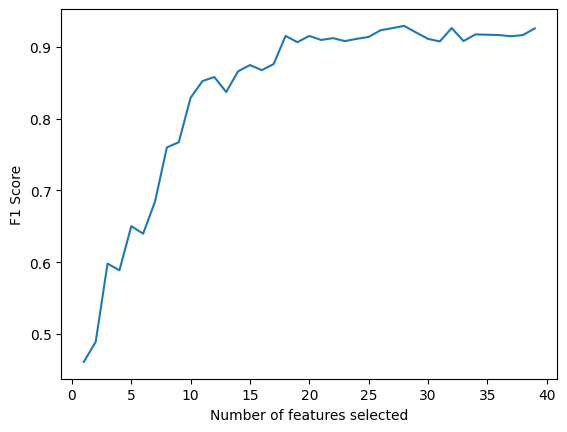

,CashbackAmount_Tenure_Ratio,Tenure,Complain_PreferedOrderCat,Complain,PreferedOrderCat_MaritalStatus,Complain_MaritalStatus,NumberOfAddress,WarehouseToHome_Tenure_Ratio,SatisfactionScore_Tenure_Ratio,PreferredLoginDevice_PreferredPaymentMode,...,Gender_PreferedOrderCat,SatisfactionScore,Gender_MaritalStatus,MaritalStatus,HourSpendOnApp_Tenure_Ratio,CouponUsed_Tenure_Ratio,SatisfactionScore_CashbackAmount,Gender_Complain,SatisfactionScore_OrderCount,PreferredPaymentMode
0,31.986000,4.0,1_Laptop & Accessory,1,Laptop & Accessory_Single,1_Single,9,1.200000,0.400000,Mobile Phone_Debit Card,...,Female_Laptop & Accessory,2,Female_Single,Single,0.600000,0.200000,319.86,Female_1,2.0,Debit Card
1,NaN,NaN,1_Mobile Phone,1,Mobile Phone_Single,1_Single,7,NaN,NaN,Mobile Phone_UPI,...,Male_Mobile Phone,3,Male_Single,Single,NaN,NaN,362.70,Male_1,3.0,UPI
2,NaN,NaN,1_Mobile Phone,1,Mobile Phone_Single,1_Single,6,NaN,NaN,Mobile Phone_Debit Card,...,Male_Mobile Phone,3,Male_Single,Single,NaN,NaN,360.84,Male_1,3.0,Debit Card
3,134.070000,0.0,0_Laptop & Accessory,0,Laptop & Accessory_Single,0_Single,8,15.000000,5.000000,Mobile Phone_Debit Card,...,Male_Laptop & Accessory,5,Male_Single,Single,2.000000,0.000000,670.35,Male_0,5.0,Debit Card
4,129.600000,0.0,0_Mobile Phone,0,Mobile Phone_Single,0_Single,3,12.000000,5.000000,Mobile Phone_Credit Card,...,Male_Mobile Phone,5,Male_Single,Single,NaN,1.000000,648.00,Male_0,5.0,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,13.700909,10.0,0_Laptop & Accessory,0,Laptop & Accessory_Married,0_Married,6,2.727273,0.090909,Computer_Credit Card,...,Male_Laptop & Accessory,1,Male_Married,Married,0.272727,0.090909,150.71,Male_0,2.0,Credit Card
5626,16.065000,13.0,0_Fashion,0,Fashion_Married,0_Married,6,0.928571,0.357143,Mobile Phone_Credit Card,...,Male_Fashion,5,Male_Married,Married,0.214286,0.071429,1124.55,Male_0,10.0,Credit Card
5627,93.210000,1.0,1_Laptop & Accessory,1,Laptop & Accessory_Married,1_Married,3,5.500000,2.000000,Mobile Phone_Debit Card,...,Male_Laptop & Accessory,4,Male_Married,Married,1.500000,0.500000,745.68,Male_1,8.0,Debit Card
5628,7.454167,23.0,0_Laptop & Accessory,0,Laptop & Accessory_Married,0_Married,4,0.375000,0.166667,Computer_Credit Card,...,Male_Laptop & Accessory,4,Male_Married,Married,0.166667,0.083333,715.60,Male_0,8.0,Credit Card


In [12]:
# Applying feature selection

make_dataset.rfe_dimensionality_reduction(X, y, estimator, 'f1', eval_set=True)

The results selected 27 from 38 features, with F1 score around 0.94. However, observing the chart, F1 score is above 0.9 until 18 features selected, reducing the complexity in the model. So there will be two model optimizations: with all the 27 selected features and with the best 18 features, in order to check if the selection of less features help to improve or at least keep the model performance.

It is important to note that 18 from 21 features generated during the feature engineering were selected by the model, which means that the feature engineering was very effective. As well as Tenure and Complain fetures have great importance for the model to predict churn.

In [13]:
selected_features = ['CashbackAmount_Tenure_Ratio', 'Tenure', 'Complain_PreferedOrderCat', 'Complain', 
                     'PreferedOrderCat_MaritalStatus', 'Complain_MaritalStatus', 'NumberOfAddress', 'WarehouseToHome_Tenure_Ratio', 
                     'SatisfactionScore_Tenure_Ratio', 'PreferredLoginDevice_PreferredPaymentMode', 'CityTier_PreferredPaymentMode', 
                     'PreferedOrderCat', 'OrderCount_Tenure_Ratio', 'DaySinceLastOrder', 'PreferredLoginDevice_CityTier', 
                     'CouponUsed', 'SatisfactionScore_NumberOfDeviceRegistered', 'Gender_PreferedOrderCat', 'SatisfactionScore', 
                     'Gender_MaritalStatus', 'MaritalStatus', 'HourSpendOnApp_Tenure_Ratio', 'CouponUsed_Tenure_Ratio', 
                     'SatisfactionScore_CashbackAmount', 'Gender_Complain', 'SatisfactionScore_OrderCount', 'PreferredPaymentMode']

red_selected_features = selected_features[:18]

In [14]:
df[selected_features].to_csv(paths.data_processed_dir('df_selected_features.csv'), index=False)
df[red_selected_features].to_csv(paths.data_processed_dir('df_red_selected_features.csv'), index=False)